In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt


In [ ]:
pip install openpyxl

In [ ]:
pip install pandas-datareader

In [ ]:
0050.TW

In [ ]:
start = dt.datetime(2010, 2, 1)
end = dt.datetime(2022, 5, 30)
data = web.DataReader('0050.TW', 'yahoo', start, end)

other_data = pd.read_csv('./assets/other_data.csv', index_col = 'Date', parse_dates = True)

In [2]:
data = pd.read_csv('C:/Users/Arifurk/Downloads/Stock-prediction-with-GAN-and-WGAN-main/asset/BEXIMCO.csv',index_col = 'Date', parse_dates = True)

In [3]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-03,310.1,321.0,310.1,319.9,2230100
2010-01-04,320.0,324.0,313.3,313.6,2002200
2010-01-05,313.0,319.9,312.6,315.8,2014200
2010-01-06,320.0,321.8,316.1,316.7,1798900
2010-01-07,317.1,322.5,317.1,321.8,2840300


In [ ]:
data['pct_change'] = (data['Close'] - data['Close'].shift(1))/ data['Close'].shift(1)
data['log_change'] = np.log(data['Close']/ data['Close'].shift(1))

In [4]:
from tools import technical_generator
Generator = technical_generator.Generator()

In [5]:
data['7ma'] = Generator.EMA(data['Close'], 7)
data['14ma'] = Generator.EMA(data['Close'], 14)
data['21ma'] = Generator.EMA(data['Close'], 21)
data['7macd'] = Generator.MACD(data['Close'], 3, 11, 7)
data['14macd'] = Generator.MACD(data['Close'], 7, 21, 14)
data['7rsi'] = Generator.RSI(data['Close'], 7)
data['14rsi'] = Generator.RSI(data['Close'], 14)
data['21rsi'] = Generator.RSI(data['Close'], 21)
data['7atr'] = Generator.atr(data['High'], data['Low'], 7)
data['14atr'] = Generator.atr(data['High'], data['Low'], 14)
data['21atr'] = Generator.atr(data['High'], data['Low'], 21)
data['7upper'], data['7lower'] = Generator.bollinger_band(data['Close'], 7)
data['14upper'], data['14lower'] = Generator.bollinger_band(data['Close'], 14)
data['21upper'], data['21lower'] = Generator.bollinger_band(data['Close'], 21)
data['7rsv'] = Generator.rsv(data['Close'], 7)
data['14rsv'] = Generator.rsv(data['Close'], 14)
data['21rsv'] = Generator.rsv(data['Close'], 21)


In [6]:
data.head(100)

,Open,High,Low,Close,Volume,7ma,14ma,21ma,7macd,14macd,...,21atr,7upper,7lower,14upper,14lower,21upper,21lower,7rsv,14rsv,21rsv
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-03,310.1,321.0,310.1,319.9,2230100,319.900000,319.900000,319.900000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,320.0,324.0,313.3,313.6,2002200,316.300000,316.525000,316.600000,0.436364,0.160714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,313.0,319.9,312.6,315.8,2014200,316.083784,316.248048,316.307553,0.439647,0.184801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,320.0,321.8,316.1,316.7,1798900,316.309143,316.386313,316.420103,0.316054,0.162211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,317.1,322.5,317.1,321.8,2840300,318.108963,317.798735,317.710288,-0.194742,0.015877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-05-23,313.0,328.0,312.0,326.1,3123700,391.099706,406.781429,408.979647,11.695213,-7.164243,...,12.704762,541.856476,283.514952,508.102147,328.554995,488.739850,343.031578,8.430610,8.430610,8.430610
2010-05-24,330.5,334.0,321.0,322.7,2714000,373.999779,395.570561,401.135285,21.559399,-2.590939,...,12.933333,540.935657,253.207200,515.202086,308.469343,495.063194,328.146330,6.225681,6.225681,6.225681
2010-05-25,324.0,326.0,316.6,317.2,2832900,359.799834,385.121145,393.504135,28.606174,2.248430,...,12.895238,526.939229,230.860771,520.123375,289.976625,500.500295,314.318753,2.658885,2.658885,2.658885


In [ ]:
data.isnull().sum()

In [7]:
other_data = pd.read_csv('C:/Users/Arifurk/Downloads/Stock-prediction-with-GAN-and-WGAN-main/asset/oher_data.csv',index_col = 'Date', parse_dates = True)
other_data.head()

,SQUARE_PHARMA,LHBL,RAK_CERAMIC
Date,,,
2010-06-13,2953.00,512.75,207.8
2010-06-14,3045.25,531.25,190.3
2010-06-15,3086.00,539.25,183.9
2010-06-16,3105.75,539.00,172.8
2010-06-17,3063.25,549.25,191.2


In [20]:
other_data.index

DatetimeIndex(['2010-06-13', '2010-06-14', '2010-06-15', '2010-06-16',
               '2010-06-17', '2010-06-20', '2010-06-21', '2010-06-22',
               '2010-06-23', '2010-06-24',
               ...
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='Date', length=3046, freq=None)

In [9]:
data_combine = data.merge(other_data, how = 'left', left_index = True, right_index = True)
data_combine

,Open,High,Low,Close,Volume,7ma,14ma,21ma,7macd,14macd,...,14upper,14lower,21upper,21lower,7rsv,14rsv,21rsv,SQUARE_PHARMA,LHBL,RAK_CERAMIC
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-03,310.1,321.0,310.1,319.9,2230100,319.900000,319.900000,319.900000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,320.0,324.0,313.3,313.6,2002200,316.300000,316.525000,316.600000,0.436364,0.160714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,313.0,319.9,312.6,315.8,2014200,316.083784,316.248048,316.307553,0.439647,0.184801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,320.0,321.8,316.1,316.7,1798900,316.309143,316.386313,316.420103,0.316054,0.162211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,317.1,322.5,317.1,321.8,2840300,318.108963,317.798735,317.710288,-0.194742,0.015877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,115.6,115.6,115.6,115.6,332883,117.514667,120.275152,122.277238,3.339805,3.354117,...,129.691130,111.737441,135.308349,112.186889,0.000000,0.000000,0.000000,215.1,73.0,42.9
2022-11-02,115.6,119.0,115.6,116.7,17075944,117.311001,119.798465,121.770216,3.103607,3.501463,...,127.088308,112.411692,134.421710,111.664005,33.333333,9.016393,6.832298,213.8,72.9,42.9
2022-11-03,117.5,118.1,115.6,116.1,11955090,117.008250,119.305336,121.254742,2.847474,3.600800,...,124.830551,112.998020,133.695053,111.076376,15.151515,6.410256,3.105590,212.4,72.4,42.9


In [10]:
data_combine = data_combine.dropna()
data_combine.head()

,Open,High,Low,Close,Volume,7ma,14ma,21ma,7macd,14macd,...,14upper,14lower,21upper,21lower,7rsv,14rsv,21rsv,SQUARE_PHARMA,LHBL,RAK_CERAMIC
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-13,327.9,334.0,321.5,330.6,4282600,327.329956,336.804907,347.692319,11.605171,22.988244,...,333.658915,317.298228,464.761513,244.333725,100.000000,89.932886,11.348898,2953.00,512.75,207.8
2010-06-14,333.0,336.9,328.6,329.6,2340000,327.897467,335.844253,346.047521,9.489265,22.343151,...,334.261340,317.681517,454.418460,244.924397,89.795918,83.221477,10.700389,3045.25,531.25,190.3
2010-06-15,330.0,332.6,326.0,326.9,1223300,327.648100,334.651686,344.306797,7.899987,21.585224,...,333.240517,320.088055,439.728998,248.423383,62.244898,53.982301,8.949416,3086.00,539.25,183.9
2010-06-16,330.0,331.0,323.0,324.6,2334600,326.886075,333.311461,342.515232,6.833465,20.791082,...,333.245754,320.039961,414.705538,259.856367,21.052632,33.628319,8.098592,3105.75,539.00,172.8
2010-06-17,328.5,332.9,324.1,325.6,4229700,326.564556,332.283266,340.977454,5.926798,19.940657,...,333.061149,319.895994,386.664922,275.563650,34.210526,42.477876,9.077705,3063.25,549.25,191.2


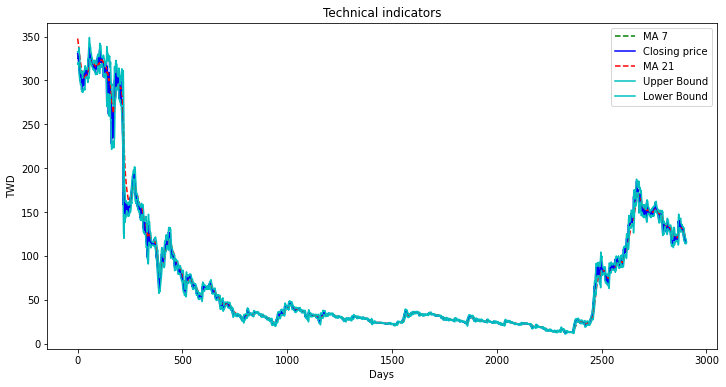

In [11]:
x_ = np.arange(data_combine.shape[0])
plt.figure(figsize=(12, 6))
plt.plot(data_combine['7ma'].values, label = 'MA 7', color = 'g', linestyle = '--')
plt.plot(data_combine['Close'].values, label = 'Closing price', color = 'b')
plt.plot(data_combine['21ma'].values, label = 'MA 21', color = 'r', linestyle = '--')
plt.plot(data_combine['7upper'].values, label = 'Upper Bound', color = 'c')
plt.plot(data_combine['7lower'].values, label = 'Lower Bound', color = 'c')
plt.fill_between(x_, data_combine['7lower'].values, data_combine['7upper'].values, alpha = 0.35)
plt.title('Technical indicators')
plt.ylabel('TWD')
plt.xlabel('Days')
plt.legend()


C:\Users\Arifurk\AppData\Local\Temp\ipykernel_9860\1637824849.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combine[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10)
H:\python\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Arifurk\AppData\Local\Temp\ipykernel_9860\1637824849.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combine[f'FT_{num_}components'] = np.fft.iff

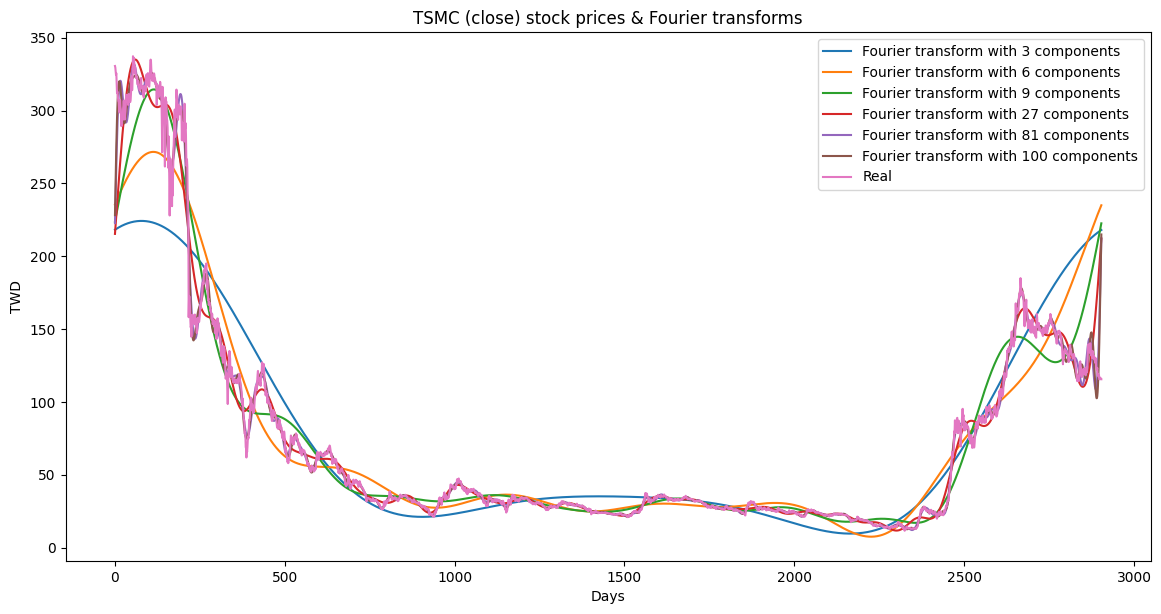

In [12]:
close_fft = np.fft.fft(np.asarray(data_combine['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 27, 81, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_] = 0
    data_combine[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10)
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_combine['Close'].values,  label='Real')
plt.xlabel('Days')
plt.ylabel('TWD')
plt.title('TSMC (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [13]:
data_combine['FT_3components'] = data_combine['FT_3components'].astype('float')
data_combine['FT_6components'] = data_combine['FT_6components'].astype('float')
data_combine['FT_9components'] = data_combine['FT_9components'].astype('float')
data_combine['FT_27components'] = data_combine['FT_27components'].astype('float')
data_combine['FT_81components'] = data_combine['FT_81components'].astype('float')
data_combine['FT_100components'] = data_combine['FT_100components'].astype('float')
data_combine.head()

H:\python\lib\site-packages\pandas\core\dtypes\cast.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
C:\Users\Arifurk\AppData\Local\Temp\ipykernel_9860\923273204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combine['FT_3components'] = data_combine['FT_3components'].astype('float')
C:\Users\Arifurk\AppData\Local\Temp\ipykernel_9860\923273204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combine['FT_6components'] =

,Open,High,Low,Close,Volume,7ma,14ma,21ma,7macd,14macd,...,21rsv,SQUARE_PHARMA,LHBL,RAK_CERAMIC,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-13,327.9,334.0,321.5,330.6,4282600,327.329956,336.804907,347.692319,11.605171,22.988244,...,11.348898,2953.00,512.75,207.8,218.213045,235.579445,223.832615,215.373199,222.749952,228.204727
2010-06-14,333.0,336.9,328.6,329.6,2340000,327.897467,335.844253,346.047521,9.489265,22.343151,...,10.700389,3045.25,531.25,190.3,218.365944,236.140292,225.057975,218.645616,233.189627,241.123532
2010-06-15,330.0,332.6,326.0,326.9,1223300,327.648100,334.651686,344.306797,7.899987,21.585224,...,8.949416,3086.00,539.25,183.9,218.516951,236.698479,226.283623,221.922412,243.420415,253.514806
2010-06-16,330.0,331.0,323.0,324.6,2334600,326.886075,333.311461,342.515232,6.833465,20.791082,...,8.098592,3105.75,539.00,172.8,218.666063,237.253956,227.509335,225.200437,253.331452,265.187952
2010-06-17,328.5,332.9,324.1,325.6,4229700,326.564556,332.283266,340.977454,5.926798,19.940657,...,9.077705,3063.25,549.25,191.2,218.813278,237.806674,228.734885,228.476537,262.817993,275.974472


In [37]:
data_combine.to_csv('./asset/data.csv')

In [14]:
result = data.isnull().sum()

In [15]:
result

Open        0
High        0
Low         0
Close       0
Volume      0
7ma         0
14ma        0
21ma        0
7macd       0
14macd      0
7rsi       19
14rsi      15
21rsi      21
7atr        6
14atr      13
21atr      20
7upper      6
7lower      6
14upper    13
14lower    13
21upper    20
21lower    20
7rsv       21
14rsv      15
21rsv      20
dtype: int64

In [33]:
data = data.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [34]:
data

,Open,High,Low,Close,Volume,7ma,14ma,21ma,7macd,14macd,...,21atr,7upper,7lower,14upper,14lower,21upper,21lower,7rsv,14rsv,21rsv
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-01,324.9,339.0,323.6,337.5,3501700,326.498453,323.882172,322.920851,-2.588747,-0.956581,...,6.409524,337.777830,311.279313,332.549977,311.164309,331.317108,311.054320,100.000000,100.000000,100.000000
2010-02-02,339.5,346.9,338.0,340.9,3132900,330.103663,326.238897,324.760801,-4.064874,-1.564018,...,6.323810,344.304577,311.409709,337.963104,309.065467,335.204564,309.766864,100.000000,100.000000,100.000000
2010-02-03,342.9,344.0,330.0,332.8,2146000,330.778424,327.142858,325.574220,-4.556956,-2.065547,...,6.642857,344.154853,315.788004,339.528183,309.300388,336.385460,310.205016,53.977273,65.236052,66.528926
2010-02-04,332.0,334.5,323.2,329.9,1789200,330.558653,327.521045,326.007459,-4.303109,-2.406495,...,6.909524,343.850761,317.977811,340.275138,309.953434,336.951458,310.896161,34.911243,52.789700,52.789700
2010-02-07,330.2,337.6,330.0,334.3,1158200,331.494518,328.447340,326.830374,-4.144684,-2.714986,...,7.014286,344.317451,320.053977,341.579123,310.992306,338.261772,310.776323,60.946746,71.673820,71.673820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,115.6,115.6,115.6,115.6,332883,117.514667,120.275152,122.277238,3.339805,3.354117,...,4.052381,120.618634,113.981366,129.691130,111.737441,135.308349,112.186889,0.000000,0.000000,0.000000
2022-11-02,115.6,119.0,115.6,116.7,17075944,117.311001,119.798465,121.770216,3.103607,3.501463,...,4.019048,119.880285,114.034000,127.088308,112.411692,134.421710,111.664005,33.333333,9.016393,6.832298
2022-11-03,117.5,118.1,115.6,116.1,11955090,117.008250,119.305336,121.254742,2.847474,3.600800,...,3.966667,119.666000,113.819715,124.830551,112.998020,133.695053,111.076376,15.151515,6.410256,3.105590


In [35]:
result = data.isnull().sum()

In [36]:
result

Open       0
High       0
Low        0
Close      0
Volume     0
7ma        0
14ma       0
21ma       0
7macd      0
14macd     0
7rsi       0
14rsi      0
21rsi      0
7atr       0
14atr      0
21atr      0
7upper     0
7lower     0
14upper    0
14lower    0
21upper    0
21lower    0
7rsv       0
14rsv      0
21rsv      0
dtype: int64

In [23]:
df=data

In [24]:
data

,Open,High,Low,Close,Volume,7ma,14ma,21ma,7macd,14macd,...,21atr,7upper,7lower,14upper,14lower,21upper,21lower,7rsv,14rsv,21rsv
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-03,310.1,321.0,310.1,319.9,2230100,319.900000,319.900000,319.900000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,320.0,324.0,313.3,313.6,2002200,316.300000,316.525000,316.600000,0.436364,0.160714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,313.0,319.9,312.6,315.8,2014200,316.083784,316.248048,316.307553,0.439647,0.184801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,320.0,321.8,316.1,316.7,1798900,316.309143,316.386313,316.420103,0.316054,0.162211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,317.1,322.5,317.1,321.8,2840300,318.108963,317.798735,317.710288,-0.194742,0.015877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,115.6,115.6,115.6,115.6,332883,117.514667,120.275152,122.277238,3.339805,3.354117,...,4.052381,120.618634,113.981366,129.691130,111.737441,135.308349,112.186889,0.000000,0.000000,0.000000
2022-11-02,115.6,119.0,115.6,116.7,17075944,117.311001,119.798465,121.770216,3.103607,3.501463,...,4.019048,119.880285,114.034000,127.088308,112.411692,134.421710,111.664005,33.333333,9.016393,6.832298
2022-11-03,117.5,118.1,115.6,116.1,11955090,117.008250,119.305336,121.254742,2.847474,3.600800,...,3.966667,119.666000,113.819715,124.830551,112.998020,133.695053,111.076376,15.151515,6.410256,3.105590


In [27]:
result = df.isnull().sum()

In [28]:
result

Open        0
High        0
Low         0
Close       0
Volume      0
7ma         0
14ma        0
21ma        0
7macd       0
14macd      0
7rsi       19
14rsi      15
21rsi      21
7atr        6
14atr      13
21atr      20
7upper      6
7lower      6
14upper    13
14lower    13
21upper    20
21lower    20
7rsv       21
14rsv      15
21rsv      20
dtype: int64